In [1]:
from keras.models import Sequential
from keras.layers import Dense
import numpy as np
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from keras.callbacks import EarlyStopping
from keras import regularizers
from keras.optimizers import SGD
from keras.layers import Dropout

Using TensorFlow backend.


In [2]:
#Készítette: Bordák Tamás
#NEPTUN: TQNX0O

ma = 298
day = 300
week = 307
month = 328

rin = np.loadtxt('test.out', delimiter=',')
dataset = rin

dataset_train = dataset[0:1460]
dataset_valid = dataset[1460:1825]
dataset_test = dataset[1825:]


X = dataset_train[:,0:1]
Y = dataset_train[:,1:2]

day_scaler = StandardScaler()
day_scaler.fit(X)
X = day_scaler.transform(X)

temp_scaler = StandardScaler()
temp_scaler.fit(Y)
Y_scaled = temp_scaler.transform(Y)



X_valid = dataset_valid[:,0:1]
Y_valid = dataset_valid[:,1:2]

X_valid = day_scaler.transform(X_valid)
Y_valid_scaled = temp_scaler.transform(Y_valid)



X_test = dataset_test[:,0:1]
Y_test = dataset_test[:,1:2]

X_test = day_scaler.transform(X_test)
Y_test_scaled = temp_scaler.transform(Y_test)

#X_test = X_valid
#Y_test = Y_valid
#Y_test_scaled = Y_valid_scaled

elore=day-ma #az elso visszanezesi pont
mennyit=1 #a visszanezes meddig erjen vissza
step = 1 #hanyasaval lepkedjen

shiftek = np.arange(elore, elore+mennyit, step)
X_in1 = X
X_valid_in1 = X_valid
X_test_in1 = X_test

print('ennyi napokat nezunk vissza', shiftek)
for i in shiftek:
    X_in1 = np.append(X_in1, np.roll(Y_scaled, i), axis=1)

for i in shiftek:
    X_valid_in1 = np.append(X_valid_in1, np.roll(Y_valid_scaled, elore), axis=1)

for i in shiftek:
    X_test_in1 = np.append(X_test_in1, np.roll(Y_test_scaled, elore), axis=1)


l1 = 0.00
l2 = 0.00

model = Sequential()
model.add(Dense(10, input_dim=1+len(shiftek), activation='relu',
                kernel_regularizer=regularizers.l2(l2),
                activity_regularizer=regularizers.l1(l1)))
model.add(Dense(25, activation='relu',
                kernel_regularizer=regularizers.l2(l2),
                activity_regularizer=regularizers.l1(l1)))
model.add(Dense(25, activation='relu',
                kernel_regularizer=regularizers.l2(l2),
                activity_regularizer=regularizers.l1(l1)))
#model.add(Dropout(0.5))

model.add(Dense(10, activation='relu',
                kernel_regularizer=regularizers.l2(l2),
                activity_regularizer=regularizers.l1(l1)))
model.add(Dense(1))


model.compile(loss='mse', optimizer=SGD(lr=0.00001, decay=1e-6, momentum=0.9, nesterov=True), metrics=['mse'])
#model.compile(loss='mse', optimizer='adagrad', metrics=['mse'])

#optimizer='adadelta',
#optimizer=SGD(lr=0.00001, momentum=0.5)


early_stopping = EarlyStopping(monitor='val_loss', patience=10)
model.fit(X_in1, Y, epochs=600, batch_size=32, validation_data=(X_valid_in1, Y_valid), callbacks=[early_stopping], shuffle=False)

scores = model.evaluate(X_test_in1, Y_test)

print("Test \n%s: %.2f" % (model.metrics_names[1], scores[1]))


#print(predictions)

ennyi napokat nezunk vissza [2]
Train on 1460 samples, validate on 365 samples
Epoch 1/600
1460/1460 [==============================] - 0s - loss: 411.7880 - mean_squared_error: 411.7880 - val_loss: 402.8200 - val_mean_squared_error: 402.8200
Epoch 2/600
1460/1460 [==============================] - 0s - loss: 393.1438 - mean_squared_error: 393.1438 - val_loss: 382.8254 - val_mean_squared_error: 382.8254
Epoch 3/600
1460/1460 [==============================] - 0s - loss: 367.6715 - mean_squared_error: 367.6715 - val_loss: 348.3282 - val_mean_squared_error: 348.3282
Epoch 4/600
1460/1460 [==============================] - 0s - loss: 314.2061 - mean_squared_error: 314.2061 - val_loss: 264.5616 - val_mean_squared_error: 264.5616
Epoch 5/600
1460/1460 [==============================] - 0s - loss: 178.8585 - mean_squared_error: 178.8585 - val_loss: 80.3025 - val_mean_squared_error: 80.3025
Epoch 6/600
1460/1460 [==============================] - 0s - loss: 52.8310 - mean_squared_error: 52.83

1460/1460 [==============================] - 0s - loss: 13.6482 - mean_squared_error: 13.6482 - val_loss: 13.6435 - val_mean_squared_error: 13.6435
Epoch 52/600
1460/1460 [==============================] - 0s - loss: 13.6315 - mean_squared_error: 13.6315 - val_loss: 13.6347 - val_mean_squared_error: 13.6347
Epoch 53/600
1460/1460 [==============================] - 0s - loss: 13.6150 - mean_squared_error: 13.6150 - val_loss: 13.6249 - val_mean_squared_error: 13.6249
Epoch 54/600
1460/1460 [==============================] - 0s - loss: 13.5982 - mean_squared_error: 13.5982 - val_loss: 13.6160 - val_mean_squared_error: 13.6160
Epoch 55/600
1460/1460 [==============================] - 0s - loss: 13.5816 - mean_squared_error: 13.5816 - val_loss: 13.6080 - val_mean_squared_error: 13.6080
Epoch 56/600
1460/1460 [==============================] - 0s - loss: 13.5652 - mean_squared_error: 13.5652 - val_loss: 13.6006 - val_mean_squared_error: 13.6006
Epoch 57/600
1460/1460 [=======================

1460/1460 [==============================] - 0s - loss: 12.7787 - mean_squared_error: 12.7787 - val_loss: 12.8613 - val_mean_squared_error: 12.8613
Epoch 102/600
1460/1460 [==============================] - 0s - loss: 12.7635 - mean_squared_error: 12.7635 - val_loss: 12.8433 - val_mean_squared_error: 12.8433
Epoch 103/600
1460/1460 [==============================] - 0s - loss: 12.7485 - mean_squared_error: 12.7485 - val_loss: 12.8257 - val_mean_squared_error: 12.8257
Epoch 104/600
1460/1460 [==============================] - 0s - loss: 12.7336 - mean_squared_error: 12.7336 - val_loss: 12.8076 - val_mean_squared_error: 12.8076
Epoch 105/600
1460/1460 [==============================] - 0s - loss: 12.7186 - mean_squared_error: 12.7186 - val_loss: 12.7897 - val_mean_squared_error: 12.7897
Epoch 106/600
1460/1460 [==============================] - 0s - loss: 12.7039 - mean_squared_error: 12.7039 - val_loss: 12.7711 - val_mean_squared_error: 12.7711
Epoch 107/600
1460/1460 [=================

1460/1460 [==============================] - 0s - loss: 12.1833 - mean_squared_error: 12.1833 - val_loss: 12.0611 - val_mean_squared_error: 12.0611
Epoch 152/600
1460/1460 [==============================] - 0s - loss: 12.1731 - mean_squared_error: 12.1731 - val_loss: 12.0485 - val_mean_squared_error: 12.0485
Epoch 153/600
1460/1460 [==============================] - 0s - loss: 12.1644 - mean_squared_error: 12.1644 - val_loss: 12.0352 - val_mean_squared_error: 12.0352
Epoch 154/600
1460/1460 [==============================] - 0s - loss: 12.1554 - mean_squared_error: 12.1554 - val_loss: 12.0222 - val_mean_squared_error: 12.0222
Epoch 155/600
1460/1460 [==============================] - 0s - loss: 12.1464 - mean_squared_error: 12.1464 - val_loss: 12.0105 - val_mean_squared_error: 12.0105
Epoch 156/600
1460/1460 [==============================] - 0s - loss: 12.1373 - mean_squared_error: 12.1373 - val_loss: 12.0012 - val_mean_squared_error: 12.0012
Epoch 157/600
1460/1460 [=================

1460/1460 [==============================] - 0s - loss: 11.9202 - mean_squared_error: 11.9202 - val_loss: 11.7013 - val_mean_squared_error: 11.7013
Epoch 202/600
1460/1460 [==============================] - 0s - loss: 11.9165 - mean_squared_error: 11.9165 - val_loss: 11.6971 - val_mean_squared_error: 11.6971
Epoch 203/600
1460/1460 [==============================] - 0s - loss: 11.9128 - mean_squared_error: 11.9128 - val_loss: 11.6916 - val_mean_squared_error: 11.6916
Epoch 204/600
1460/1460 [==============================] - 0s - loss: 11.9092 - mean_squared_error: 11.9092 - val_loss: 11.6866 - val_mean_squared_error: 11.6866
Epoch 205/600
1460/1460 [==============================] - 0s - loss: 11.9060 - mean_squared_error: 11.9060 - val_loss: 11.6811 - val_mean_squared_error: 11.6811
Epoch 206/600
1460/1460 [==============================] - 0s - loss: 11.9021 - mean_squared_error: 11.9021 - val_loss: 11.6768 - val_mean_squared_error: 11.6768
Epoch 207/600
1460/1460 [=================

1460/1460 [==============================] - 0s - loss: 11.7672 - mean_squared_error: 11.7672 - val_loss: 11.5250 - val_mean_squared_error: 11.5250
Epoch 252/600
1460/1460 [==============================] - 0s - loss: 11.7646 - mean_squared_error: 11.7646 - val_loss: 11.5232 - val_mean_squared_error: 11.5232
Epoch 253/600
1460/1460 [==============================] - 0s - loss: 11.7622 - mean_squared_error: 11.7622 - val_loss: 11.5205 - val_mean_squared_error: 11.5205
Epoch 254/600
1460/1460 [==============================] - 0s - loss: 11.7594 - mean_squared_error: 11.7594 - val_loss: 11.5189 - val_mean_squared_error: 11.5189
Epoch 255/600
1460/1460 [==============================] - 0s - loss: 11.7572 - mean_squared_error: 11.7572 - val_loss: 11.5167 - val_mean_squared_error: 11.5167
Epoch 256/600
1460/1460 [==============================] - 0s - loss: 11.7546 - mean_squared_error: 11.7546 - val_loss: 11.5147 - val_mean_squared_error: 11.5147
Epoch 257/600
1460/1460 [=================

1460/1460 [==============================] - 0s - loss: 11.6239 - mean_squared_error: 11.6239 - val_loss: 11.4444 - val_mean_squared_error: 11.4444
Epoch 302/600
1460/1460 [==============================] - 0s - loss: 11.6211 - mean_squared_error: 11.6211 - val_loss: 11.4443 - val_mean_squared_error: 11.4443
Epoch 303/600
1460/1460 [==============================] - 0s - loss: 11.6192 - mean_squared_error: 11.6192 - val_loss: 11.4430 - val_mean_squared_error: 11.4430
Epoch 304/600
1460/1460 [==============================] - 0s - loss: 11.6171 - mean_squared_error: 11.6171 - val_loss: 11.4415 - val_mean_squared_error: 11.4415
Epoch 305/600
1460/1460 [==============================] - 0s - loss: 11.6146 - mean_squared_error: 11.6146 - val_loss: 11.4416 - val_mean_squared_error: 11.4416
Epoch 306/600
1460/1460 [==============================] - 0s - loss: 11.6129 - mean_squared_error: 11.6129 - val_loss: 11.4399 - val_mean_squared_error: 11.4399
Epoch 307/600
1460/1460 [=================

1460/1460 [==============================] - 0s - loss: 11.5384 - mean_squared_error: 11.5384 - val_loss: 11.3883 - val_mean_squared_error: 11.3883
Epoch 352/600
1460/1460 [==============================] - 0s - loss: 11.5380 - mean_squared_error: 11.5380 - val_loss: 11.3869 - val_mean_squared_error: 11.3869
Epoch 353/600
1460/1460 [==============================] - 0s - loss: 11.5364 - mean_squared_error: 11.5364 - val_loss: 11.3878 - val_mean_squared_error: 11.3878
Epoch 354/600
1460/1460 [==============================] - 0s - loss: 11.5357 - mean_squared_error: 11.5357 - val_loss: 11.3869 - val_mean_squared_error: 11.3869
Epoch 355/600
1460/1460 [==============================] - 0s - loss: 11.5348 - mean_squared_error: 11.5348 - val_loss: 11.3847 - val_mean_squared_error: 11.3847
Epoch 356/600
1460/1460 [==============================] - 0s - loss: 11.5337 - mean_squared_error: 11.5337 - val_loss: 11.3865 - val_mean_squared_error: 11.3865
Epoch 357/600
1460/1460 [=================

1460/1460 [==============================] - 0s - loss: 11.5036 - mean_squared_error: 11.5036 - val_loss: 11.3598 - val_mean_squared_error: 11.3598
Epoch 402/600
1460/1460 [==============================] - 0s - loss: 11.5025 - mean_squared_error: 11.5025 - val_loss: 11.3599 - val_mean_squared_error: 11.3599
Epoch 403/600
1460/1460 [==============================] - 0s - loss: 11.5027 - mean_squared_error: 11.5027 - val_loss: 11.3594 - val_mean_squared_error: 11.3594
Epoch 404/600
1460/1460 [==============================] - 0s - loss: 11.5016 - mean_squared_error: 11.5016 - val_loss: 11.3595 - val_mean_squared_error: 11.3595
Epoch 405/600
1460/1460 [==============================] - 0s - loss: 11.5016 - mean_squared_error: 11.5016 - val_loss: 11.3593 - val_mean_squared_error: 11.3593
Epoch 406/600
1460/1460 [==============================] - 0s - loss: 11.5007 - mean_squared_error: 11.5007 - val_loss: 11.3595 - val_mean_squared_error: 11.3595
Epoch 407/600
1460/1460 [=================

1460/1460 [==============================] - 0s - loss: 11.4811 - mean_squared_error: 11.4811 - val_loss: 11.3516 - val_mean_squared_error: 11.3516
Epoch 452/600
1460/1460 [==============================] - 0s - loss: 11.4810 - mean_squared_error: 11.4810 - val_loss: 11.3517 - val_mean_squared_error: 11.3517
Epoch 453/600
1460/1460 [==============================] - 0s - loss: 11.4807 - mean_squared_error: 11.4807 - val_loss: 11.3511 - val_mean_squared_error: 11.3511
Epoch 454/600
1460/1460 [==============================] - 0s - loss: 11.4800 - mean_squared_error: 11.4800 - val_loss: 11.3507 - val_mean_squared_error: 11.3507
Epoch 455/600
1460/1460 [==============================] - 0s - loss: 11.4792 - mean_squared_error: 11.4792 - val_loss: 11.3516 - val_mean_squared_error: 11.3516
Epoch 456/600
1460/1460 [==============================] - 0s - loss: 11.4796 - mean_squared_error: 11.4796 - val_loss: 11.3511 - val_mean_squared_error: 11.3511
Epoch 457/600
1460/1460 [=================

1460/1460 [==============================] - 0s - loss: 11.4617 - mean_squared_error: 11.4617 - val_loss: 11.3487 - val_mean_squared_error: 11.3487
Epoch 502/600
1460/1460 [==============================] - 0s - loss: 11.4620 - mean_squared_error: 11.4620 - val_loss: 11.3481 - val_mean_squared_error: 11.3481
Epoch 503/600
1460/1460 [==============================] - 0s - loss: 11.4613 - mean_squared_error: 11.4613 - val_loss: 11.3482 - val_mean_squared_error: 11.3482
Epoch 504/600
1460/1460 [==============================] - 0s - loss: 11.4609 - mean_squared_error: 11.4609 - val_loss: 11.3487 - val_mean_squared_error: 11.3487
Epoch 505/600
1460/1460 [==============================] - 0s - loss: 11.4610 - mean_squared_error: 11.4610 - val_loss: 11.3487 - val_mean_squared_error: 11.3487
Epoch 506/600
1460/1460 [==============================] - 0s - loss: 11.4607 - mean_squared_error: 11.4607 - val_loss: 11.3489 - val_mean_squared_error: 11.3489
Epoch 507/600
1460/1460 [=================

In [3]:
elore=week-ma #az elso visszanezesi pont
mennyit=1 #a visszanezes meddig erjen vissza
step = 1 #hanyasaval lepkedjen

shiftek = np.arange(elore, elore+mennyit, step)
X_in2 = X
X_valid_in2 = X_valid
X_test_in2 = X_test

print('ennyi napokat nezunk vissza', shiftek)
for i in shiftek:
    X_in2 = np.append(X_in2, np.roll(Y_scaled, i), axis=1)

for i in shiftek:
    X_valid_in2 = np.append(X_valid_in2, np.roll(Y_valid_scaled, elore), axis=1)

for i in shiftek:
    X_test_in2 = np.append(X_test_in2, np.roll(Y_test_scaled, elore), axis=1)



l1 = 0.00
l2 = 0.00

model2 = Sequential()
model2.add(Dense(10, input_dim=1+len(shiftek), activation='relu',
                kernel_regularizer=regularizers.l2(l2),
                activity_regularizer=regularizers.l1(l1)))
model2.add(Dense(25, activation='relu',
                kernel_regularizer=regularizers.l2(l2),
                activity_regularizer=regularizers.l1(l1)))
model2.add(Dense(25, activation='relu',
                kernel_regularizer=regularizers.l2(l2),
                activity_regularizer=regularizers.l1(l1)))
#model2.add(Dropout(0.5))

model2.add(Dense(10, activation='relu',
                kernel_regularizer=regularizers.l2(l2),
                activity_regularizer=regularizers.l1(l1)))
model2.add(Dense(1))


#model2.compile(loss='mse', optimizer=SGD(lr=0.00001, decay=1e-6, momentum=0.9, nesterov=True), metrics=['mse'])
model2.compile(loss='mse', optimizer='adagrad', metrics=['mse'])

#optimizer='adadelta',
#optimizer=SGD(lr=0.00001, momentum=0.5)


early_stopping = EarlyStopping(monitor='val_loss', patience=10)
model2.fit(X_in2, Y, epochs=600, batch_size=32, validation_data=(X_valid_in2, Y_valid), callbacks=[early_stopping], shuffle=False)

scores = model2.evaluate(X_test_in2, Y_test)

print("Test \n%s: %.2f" % (model2.metrics_names[1], scores[1]))

ennyi napokat nezunk vissza [9]
Train on 1460 samples, validate on 365 samples
Epoch 1/600
1460/1460 [==============================] - 0s - loss: 327.8330 - mean_squared_error: 327.8330 - val_loss: 233.8321 - val_mean_squared_error: 233.8321
Epoch 2/600
1460/1460 [==============================] - 0s - loss: 165.9697 - mean_squared_error: 165.9697 - val_loss: 98.5774 - val_mean_squared_error: 98.5774
Epoch 3/600
1460/1460 [==============================] - 0s - loss: 84.9978 - mean_squared_error: 84.9978 - val_loss: 56.8316 - val_mean_squared_error: 56.8316
Epoch 4/600
1460/1460 [==============================] - 0s - loss: 61.9463 - mean_squared_error: 61.9463 - val_loss: 45.4170 - val_mean_squared_error: 45.4170
Epoch 5/600
1460/1460 [==============================] - 0s - loss: 54.2200 - mean_squared_error: 54.2200 - val_loss: 40.0615 - val_mean_squared_error: 40.0615
Epoch 6/600
1460/1460 [==============================] - 0s - loss: 50.0843 - mean_squared_error: 50.0843 - val_los

1460/1460 [==============================] - 0s - loss: 30.6148 - mean_squared_error: 30.6148 - val_loss: 24.7923 - val_mean_squared_error: 24.7923
Epoch 52/600
1460/1460 [==============================] - 0s - loss: 30.4437 - mean_squared_error: 30.4437 - val_loss: 24.6604 - val_mean_squared_error: 24.6604
Epoch 53/600
1460/1460 [==============================] - 0s - loss: 30.2732 - mean_squared_error: 30.2732 - val_loss: 24.5268 - val_mean_squared_error: 24.5268
Epoch 54/600
1460/1460 [==============================] - 0s - loss: 30.1001 - mean_squared_error: 30.1001 - val_loss: 24.3930 - val_mean_squared_error: 24.3930
Epoch 55/600
1460/1460 [==============================] - 0s - loss: 29.9255 - mean_squared_error: 29.9255 - val_loss: 24.2538 - val_mean_squared_error: 24.2538
Epoch 56/600
1460/1460 [==============================] - 0s - loss: 29.7491 - mean_squared_error: 29.7491 - val_loss: 24.1146 - val_mean_squared_error: 24.1146
Epoch 57/600
1460/1460 [=======================

1460/1460 [==============================] - 0s - loss: 22.9115 - mean_squared_error: 22.9115 - val_loss: 18.8055 - val_mean_squared_error: 18.8055
Epoch 102/600
1460/1460 [==============================] - 0s - loss: 22.7957 - mean_squared_error: 22.7957 - val_loss: 18.7211 - val_mean_squared_error: 18.7211
Epoch 103/600
1460/1460 [==============================] - 0s - loss: 22.6827 - mean_squared_error: 22.6827 - val_loss: 18.6406 - val_mean_squared_error: 18.6406
Epoch 104/600
1460/1460 [==============================] - 0s - loss: 22.5738 - mean_squared_error: 22.5738 - val_loss: 18.5619 - val_mean_squared_error: 18.5619
Epoch 105/600
1460/1460 [==============================] - 0s - loss: 22.4679 - mean_squared_error: 22.4679 - val_loss: 18.4869 - val_mean_squared_error: 18.4869
Epoch 106/600
1460/1460 [==============================] - 0s - loss: 22.3649 - mean_squared_error: 22.3649 - val_loss: 18.4138 - val_mean_squared_error: 18.4138
Epoch 107/600
1460/1460 [=================

1460/1460 [==============================] - 0s - loss: 19.7144 - mean_squared_error: 19.7144 - val_loss: 16.5029 - val_mean_squared_error: 16.5029
Epoch 152/600
1460/1460 [==============================] - 0s - loss: 19.6842 - mean_squared_error: 19.6842 - val_loss: 16.4831 - val_mean_squared_error: 16.4831
Epoch 153/600
1460/1460 [==============================] - 0s - loss: 19.6551 - mean_squared_error: 19.6551 - val_loss: 16.4623 - val_mean_squared_error: 16.4623
Epoch 154/600
1460/1460 [==============================] - 0s - loss: 19.6262 - mean_squared_error: 19.6262 - val_loss: 16.4408 - val_mean_squared_error: 16.4408
Epoch 155/600
1460/1460 [==============================] - 0s - loss: 19.5980 - mean_squared_error: 19.5980 - val_loss: 16.4187 - val_mean_squared_error: 16.4187
Epoch 156/600
1460/1460 [==============================] - 0s - loss: 19.5706 - mean_squared_error: 19.5706 - val_loss: 16.3972 - val_mean_squared_error: 16.3972
Epoch 157/600
1460/1460 [=================

1460/1460 [==============================] - 0s - loss: 18.7408 - mean_squared_error: 18.7408 - val_loss: 15.9896 - val_mean_squared_error: 15.9896
Epoch 202/600
1460/1460 [==============================] - 0s - loss: 18.7296 - mean_squared_error: 18.7296 - val_loss: 15.9861 - val_mean_squared_error: 15.9861
Epoch 203/600
1460/1460 [==============================] - 0s - loss: 18.7183 - mean_squared_error: 18.7183 - val_loss: 15.9833 - val_mean_squared_error: 15.9833
Epoch 204/600
1460/1460 [==============================] - 0s - loss: 18.7069 - mean_squared_error: 18.7069 - val_loss: 15.9809 - val_mean_squared_error: 15.9809
Epoch 205/600
1460/1460 [==============================] - 0s - loss: 18.6957 - mean_squared_error: 18.6957 - val_loss: 15.9793 - val_mean_squared_error: 15.9793
Epoch 206/600
1460/1460 [==============================] - 0s - loss: 18.6852 - mean_squared_error: 18.6852 - val_loss: 15.9776 - val_mean_squared_error: 15.9776
Epoch 207/600
1460/1460 [=================

1460/1460 [==============================] - 0s - loss: 18.2970 - mean_squared_error: 18.2970 - val_loss: 15.9458 - val_mean_squared_error: 15.9458
Epoch 252/600
1460/1460 [==============================] - 0s - loss: 18.2907 - mean_squared_error: 18.2907 - val_loss: 15.9473 - val_mean_squared_error: 15.9473
Epoch 253/600
1460/1460 [==============================] - 0s - loss: 18.2842 - mean_squared_error: 18.2842 - val_loss: 15.9482 - val_mean_squared_error: 15.9482
Epoch 254/600
 32/298 [==>...........................] - ETA: 0sTest 
mean_squared_error: 19.08


In [4]:
elore=month-ma #az elso visszanezesi pont
mennyit=1 #a visszanezes meddig erjen vissza
step = 1 #hanyasaval lepkedjen

shiftek = np.arange(elore, elore+mennyit, step)
X_in3 = X
X_valid_in3 = X_valid
X_test_in3 = X_test

print('ennyi napokat nezunk vissza', shiftek)
for i in shiftek:
    X_in3 = np.append(X_in3, np.roll(Y_scaled, i), axis=1)

for i in shiftek:
    X_valid_in3 = np.append(X_valid_in3, np.roll(Y_valid_scaled, elore), axis=1)

for i in shiftek:
    X_test_in3 = np.append(X_test_in3, np.roll(Y_test_scaled, elore), axis=1)



l1 = 0.00
l2 = 0.00

model3 = Sequential()
model3.add(Dense(10, input_dim=1+len(shiftek), activation='relu',
                kernel_regularizer=regularizers.l2(l2),
                activity_regularizer=regularizers.l1(l1)))
model3.add(Dense(25, activation='relu',
                kernel_regularizer=regularizers.l2(l2),
                activity_regularizer=regularizers.l1(l1)))
model3.add(Dense(25, activation='relu',
                kernel_regularizer=regularizers.l2(l2),
                activity_regularizer=regularizers.l1(l1)))
#model3.add(Dropout(0.5))
model3.add(Dense(10, activation='relu',
                kernel_regularizer=regularizers.l2(l2),
                activity_regularizer=regularizers.l1(l1)))
model3.add(Dense(1))


#model3.compile(loss='mse', optimizer=SGD(lr=0.00001, decay=1e-6, momentum=0.9, nesterov=True), metrics=['mse'])
model3.compile(loss='mse', optimizer='adagrad', metrics=['mse'])

#optimizer='adadelta',
#optimizer=SGD(lr=0.00001, momentum=0.5)


early_stopping = EarlyStopping(monitor='val_loss', patience=10)
model3.fit(X_in3, Y, epochs=600, batch_size=32, validation_data=(X_valid_in3, Y_valid), callbacks=[early_stopping], shuffle=False)

scores = model3.evaluate(X_test_in3, Y_test)

print("Test \n%s: %.2f" % (model3.metrics_names[1], scores[1]))

ennyi napokat nezunk vissza [30]
Train on 1460 samples, validate on 365 samples
Epoch 1/600
1460/1460 [==============================] - 0s - loss: 297.5904 - mean_squared_error: 297.5904 - val_loss: 170.9645 - val_mean_squared_error: 170.9645
Epoch 2/600
1460/1460 [==============================] - 0s - loss: 121.5539 - mean_squared_error: 121.5539 - val_loss: 78.5092 - val_mean_squared_error: 78.5092
Epoch 3/600
1460/1460 [==============================] - 0s - loss: 84.4064 - mean_squared_error: 84.4064 - val_loss: 65.1973 - val_mean_squared_error: 65.1973
Epoch 4/600
1460/1460 [==============================] - 0s - loss: 76.9225 - mean_squared_error: 76.9225 - val_loss: 59.6586 - val_mean_squared_error: 59.6586
Epoch 5/600
1460/1460 [==============================] - 0s - loss: 72.8715 - mean_squared_error: 72.8715 - val_loss: 56.0194 - val_mean_squared_error: 56.0194
Epoch 6/600
1460/1460 [==============================] - 0s - loss: 69.9911 - mean_squared_error: 69.9911 - val_lo

1460/1460 [==============================] - 0s - loss: 34.2736 - mean_squared_error: 34.2736 - val_loss: 24.0789 - val_mean_squared_error: 24.0789
Epoch 52/600
1460/1460 [==============================] - 0s - loss: 33.8069 - mean_squared_error: 33.8069 - val_loss: 23.7713 - val_mean_squared_error: 23.7713
Epoch 53/600
1460/1460 [==============================] - 0s - loss: 33.3594 - mean_squared_error: 33.3594 - val_loss: 23.4724 - val_mean_squared_error: 23.4724
Epoch 54/600
1460/1460 [==============================] - 0s - loss: 32.9302 - mean_squared_error: 32.9302 - val_loss: 23.1831 - val_mean_squared_error: 23.1831
Epoch 55/600
1460/1460 [==============================] - 0s - loss: 32.5193 - mean_squared_error: 32.5193 - val_loss: 22.8943 - val_mean_squared_error: 22.8943
Epoch 56/600
1460/1460 [==============================] - 0s - loss: 32.1221 - mean_squared_error: 32.1221 - val_loss: 22.6099 - val_mean_squared_error: 22.6099
Epoch 57/600
1460/1460 [=======================

1460/1460 [==============================] - 0s - loss: 22.8801 - mean_squared_error: 22.8801 - val_loss: 17.2510 - val_mean_squared_error: 17.2510
Epoch 102/600
1460/1460 [==============================] - 0s - loss: 22.8113 - mean_squared_error: 22.8113 - val_loss: 17.2205 - val_mean_squared_error: 17.2205
Epoch 103/600
1460/1460 [==============================] - 0s - loss: 22.7438 - mean_squared_error: 22.7438 - val_loss: 17.1910 - val_mean_squared_error: 17.1910
Epoch 104/600
1460/1460 [==============================] - 0s - loss: 22.6793 - mean_squared_error: 22.6793 - val_loss: 17.1628 - val_mean_squared_error: 17.1628
Epoch 105/600
1460/1460 [==============================] - 0s - loss: 22.6170 - mean_squared_error: 22.6170 - val_loss: 17.1356 - val_mean_squared_error: 17.1356
Epoch 106/600
1460/1460 [==============================] - 0s - loss: 22.5558 - mean_squared_error: 22.5558 - val_loss: 17.1085 - val_mean_squared_error: 17.1085
Epoch 107/600
1460/1460 [=================

1460/1460 [==============================] - 0s - loss: 20.9713 - mean_squared_error: 20.9713 - val_loss: 16.4569 - val_mean_squared_error: 16.4569
Epoch 152/600
1460/1460 [==============================] - 0s - loss: 20.9482 - mean_squared_error: 20.9482 - val_loss: 16.4481 - val_mean_squared_error: 16.4481
Epoch 153/600
1460/1460 [==============================] - 0s - loss: 20.9254 - mean_squared_error: 20.9254 - val_loss: 16.4391 - val_mean_squared_error: 16.4391
Epoch 154/600
1460/1460 [==============================] - 0s - loss: 20.9034 - mean_squared_error: 20.9034 - val_loss: 16.4300 - val_mean_squared_error: 16.4300
Epoch 155/600
1460/1460 [==============================] - 0s - loss: 20.8811 - mean_squared_error: 20.8811 - val_loss: 16.4212 - val_mean_squared_error: 16.4212
Epoch 156/600
1460/1460 [==============================] - 0s - loss: 20.8589 - mean_squared_error: 20.8589 - val_loss: 16.4123 - val_mean_squared_error: 16.4123
Epoch 157/600
1460/1460 [=================

1460/1460 [==============================] - 0s - loss: 20.1492 - mean_squared_error: 20.1492 - val_loss: 16.1289 - val_mean_squared_error: 16.1289
Epoch 202/600
1460/1460 [==============================] - 0s - loss: 20.1366 - mean_squared_error: 20.1366 - val_loss: 16.1237 - val_mean_squared_error: 16.1237
Epoch 203/600
1460/1460 [==============================] - 0s - loss: 20.1246 - mean_squared_error: 20.1246 - val_loss: 16.1192 - val_mean_squared_error: 16.1192
Epoch 204/600
1460/1460 [==============================] - 0s - loss: 20.1122 - mean_squared_error: 20.1122 - val_loss: 16.1158 - val_mean_squared_error: 16.1158
Epoch 205/600
1460/1460 [==============================] - 0s - loss: 20.1000 - mean_squared_error: 20.1000 - val_loss: 16.1102 - val_mean_squared_error: 16.1102
Epoch 206/600
1460/1460 [==============================] - 0s - loss: 20.0890 - mean_squared_error: 20.0890 - val_loss: 16.1052 - val_mean_squared_error: 16.1052
Epoch 207/600
1460/1460 [=================

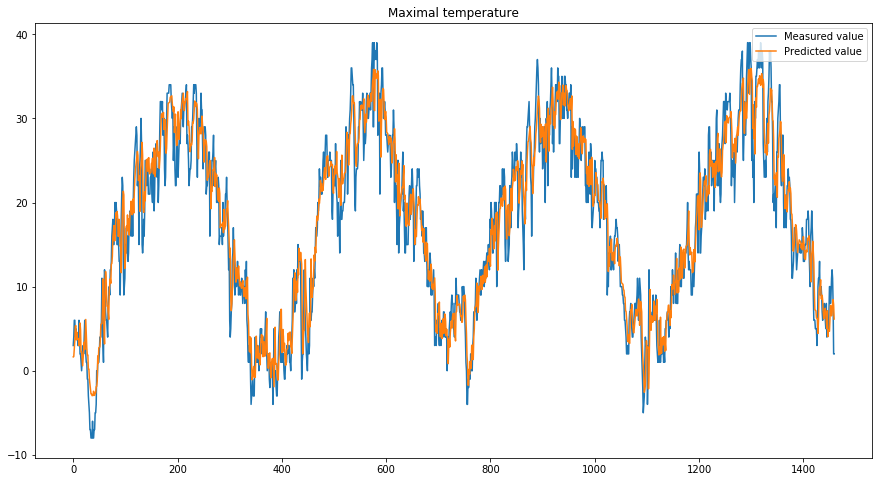

In [5]:
#teszt adat fedese annal jobb minel kevesebb napra kell elorejelezni
predictions = model.predict(X_in1)
plt.figure(figsize=(15, 8))
plt.title("Maximal temperature")
plt.plot(Y,label="Measured value")
plt.plot(predictions,label="Predicted value")
plt.legend(loc='upper right')
plt.show()

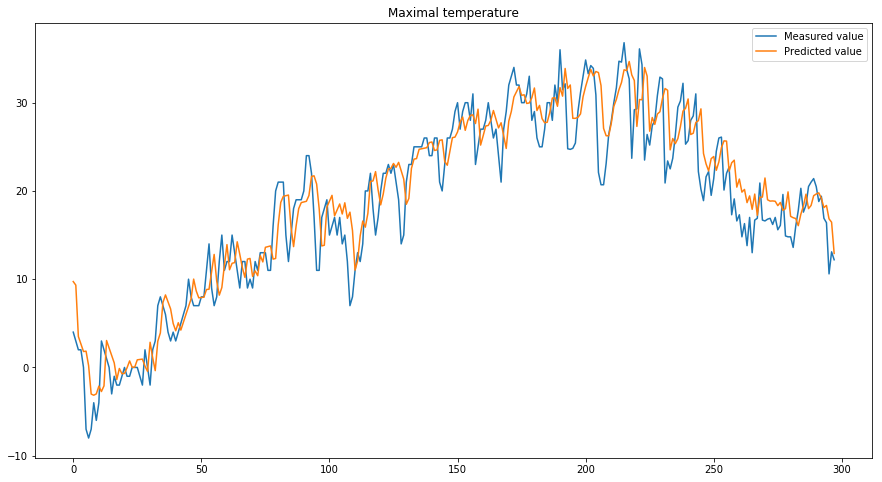

In [6]:
#teszt adat fedese annal jobb minel kevesebb napra kell elorejelezni
predictions = model.predict(X_test_in1)
plt.figure(figsize=(15, 8))
plt.title("Maximal temperature")
plt.plot(Y_test,label="Measured value")
plt.plot(predictions,label="Predicted value")
plt.legend(loc='upper right')
plt.show()

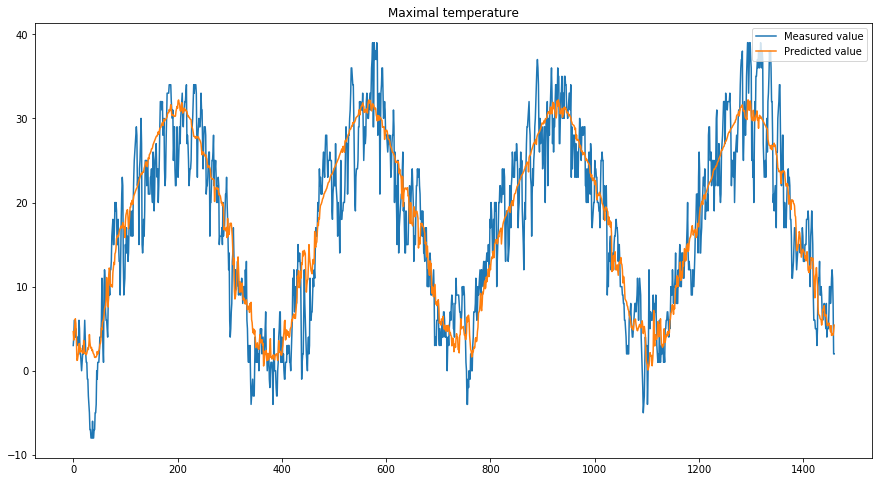

In [7]:
#teszt adat fedese annal jobb minel kevesebb napra kell elorejelezni
predictions = model2.predict(X_in2)
plt.figure(figsize=(15, 8))
plt.title("Maximal temperature")
plt.plot(Y,label="Measured value")
plt.plot(predictions,label="Predicted value")
plt.legend(loc='upper right')
plt.show()

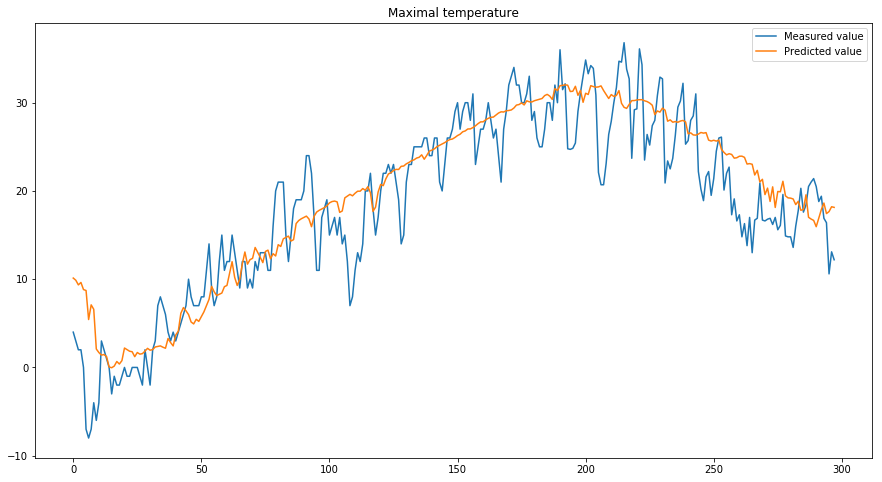

In [8]:
#teszt adat fedese annal jobb minel kevesebb napra kell elorejelezni
predictions = model2.predict(X_test_in2)
plt.figure(figsize=(15, 8))
plt.title("Maximal temperature")
plt.plot(Y_test,label="Measured value")
plt.plot(predictions,label="Predicted value")
plt.legend(loc='upper right')
plt.show()

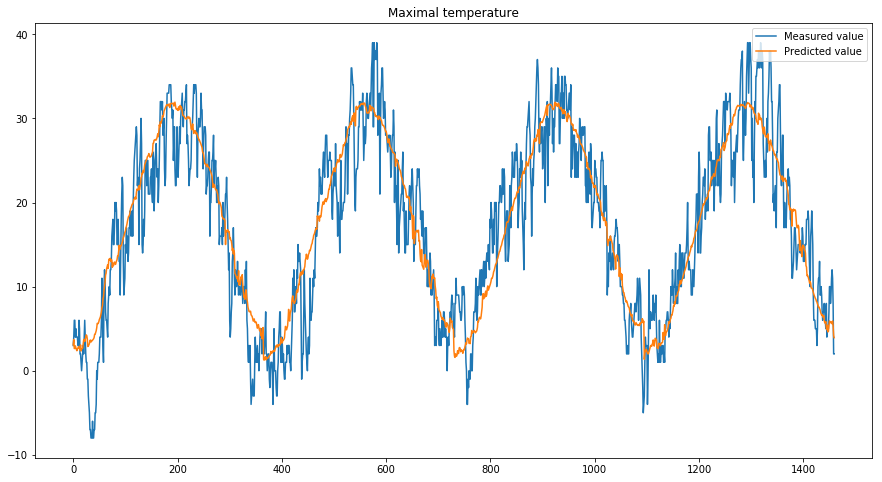

In [9]:
#teszt adat fedese annal jobb minel kevesebb napra kell elorejelezni
predictions = model3.predict(X_in3)
plt.figure(figsize=(15, 8))
plt.title("Maximal temperature")
plt.plot(Y,label="Measured value")
plt.plot(predictions,label="Predicted value")
plt.legend(loc='upper right')
plt.show()

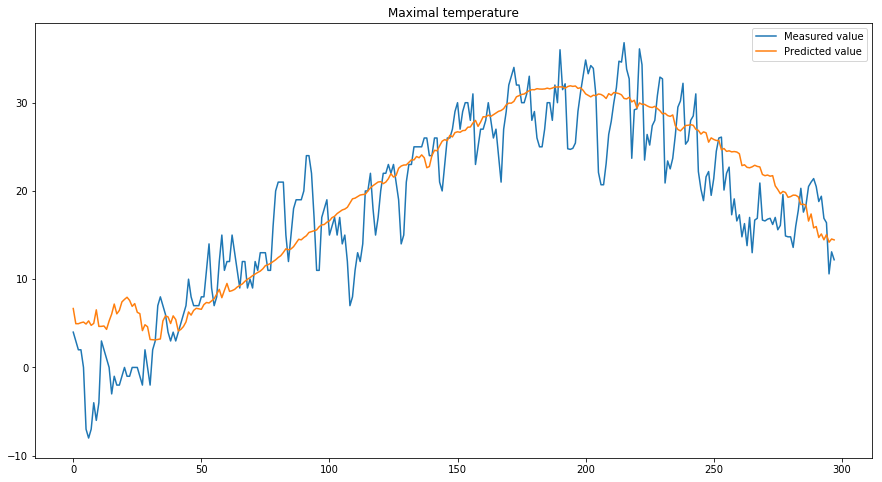

In [10]:
#teszt adat fedese annal jobb minel kevesebb napra kell elorejelezni
predictions = model3.predict(X_test_in3)
plt.figure(figsize=(15, 8))
plt.title("Maximal temperature")
plt.plot(Y_test,label="Measured value")
plt.plot(predictions,label="Predicted value")
plt.legend(loc='upper right')
plt.show()

In [11]:

tmp_day = temp_scaler.transform(np.array([12.2], dtype=float).reshape(-1,1))
day_t = day_scaler.transform(np.array([day], dtype=float).reshape(-1,1))
week_t = day_scaler.transform(np.array([week], dtype=float).reshape(-1,1))
month_t = day_scaler.transform(np.array([month], dtype=float).reshape(-1,1))

predictions = model.predict(np.array([day_t, tmp_day]).reshape(-1, 2))
print('október 27.')
print(predictions[0,0])
predictions = model.predict(np.array([week_t, tmp_day]).reshape(-1, 2))
print('november 3.')
print(predictions[0,0])
predictions = model.predict(np.array([month_t, tmp_day]).reshape(-1, 2))
print('november 24.')
print(predictions[0,0])

október 27.
13.6882
november 3.
13.0266
november 24.
11.2213
